<a href="https://colab.research.google.com/github/priyankabutun/Data/blob/main/Mydaily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
from IPython.display import clear_output

In [24]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
 $('div.cell.code_cell.rendered.selected div.input').hide();
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" class="btn btn-primary" value="Click here to toggle on/off the raw code."></form>''')

## Dataset Description: Daily Transaction Data

This dataset contains information about daily transactions with the following columns:

*   **Date:** Timestamp for when each transaction occurs.
*   **Mode:** Specifies the payment method used.
*   **Category:** Broad grouping for each type of transaction.
*   **Subcategory:** More detailed breakdown within each category.
*   **Note:** Short description of the transaction.
*   **Amount:** Value of each transaction.
*   **Income/Expense:** Indicates if the transaction is an expense or income.
*   **Currency:** All amounts are listed in Indian Rupees (INR).

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Daily Household Transactions.csv'
df= pd.read_csv(file_path)

In [27]:
display(df.head())

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [29]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 9


In [30]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 2452


In [31]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                0
Mode                0
Category            0
Subcategory       629
Note              512
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [32]:
amount_descriptive_stats = df['Amount'].describe()
display(amount_descriptive_stats)

,Amount
count,2452.000000
mean,2757.976664
std,12542.057491
min,2.000000
25%,35.000000
50%,100.000000
75%,784.500000
max,250000.000000


In [33]:
total_income = df[df['Income/Expense'] == 'Income']['Amount'].sum()
total_expenses = df[df['Income/Expense'] == 'Expense']['Amount'].sum()
net_savings = total_income - total_expenses

# Avoid division by zero if total income is zero
savings_rate = (net_savings / total_income) * 100 if total_income != 0 else 0


print(f"Total Income: ₹{total_income:,.2f}")
print(f"Total Expenses: ₹{total_expenses:,.2f}")
print(f"Net Savings: ₹{net_savings:,.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")

Total Income: ₹3,042,397.35
Total Expenses: ₹1,955,380.53
Net Savings: ₹1,087,016.82
Savings Rate: 35.73%


In [34]:
# Calculate statistics for the entire 'Amount' column
amount_stats = df['Amount'].describe()

print("Statistical Analysis for the Entire 'Amount' Column:")
print(f"Average Amount per Transaction: ₹{amount_stats['mean']:,.2f}")
print(f"Median Amount per Transaction: ₹{amount_stats['50%']:,.2f}")
print(f"Amount Standard Deviation: ₹{amount_stats['std']:,.2f}")
print(f"Amount Coefficient of Variation: {amount_stats['std']/amount_stats['mean']*100:.2f}%")
print(f"Amount Range: ₹{amount_stats['min']:,.2f} to ₹{amount_stats['max']:,.2f}")

Statistical Analysis for the Entire 'Amount' Column:
Average Amount per Transaction: ₹2,757.98
Median Amount per Transaction: ₹100.00
Amount Standard Deviation: ₹12,542.06
Amount Coefficient of Variation: 454.76%
Amount Range: ₹2.00 to ₹250,000.00


In [35]:
expense_data =df[df['Income/Expense'] == 'Expense']
display(expense_data.head())

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [36]:
category_spending = expense_data.groupby('Category')['Amount'].sum().reset_index()
display(category_spending)

,Category,Amount
0,Apparel,25373.82
1,Beauty,4189.00
2,Cook,12443.00
3,Culture,4304.36
4,Documents,100.00
5,Education,537.00
6,Family,78582.20
7,Festivals,6911.00
8,Food,96393.10
9,Gift,40168.00


In [37]:
df_expenses = df[df['Income/Expense'] == 'Expense']
#Top 15 Categories expenses
category_expenses = df_expenses.groupby('Category')['Amount'].sum().sort_values(ascending=True).tail(15)
display(category_expenses)

,Amount
Category,
maid,21839.00
Recurring Deposit,22000.00
Apparel,25373.82
Gift,40168.00
Tourism,63608.85
Health,66252.75
Family,78582.20
Other,87025.28
Public Provident Fund,90000.00


In [38]:

#Top 15 Subcategories
subcategory_expenses = df_expenses.groupby('Subcategory')['Amount'].sum().sort_values(ascending=True).tail(15)
display(subcategory_expenses)

,Amount
Subcategory,
RD,22000.00
Dinner,22903.10
Mobile Service Provider,26650.00
Health,31497.75
Travels,32338.98
LIC,33858.00
Kirana,39147.58
Pocket money,58195.00
Trip,63300.00


In [39]:

category_spending = expense_data.groupby('Category')['Amount'].sum().reset_index()

fig = px.pie(category_spending, values='Amount', names='Category', title='Household Spending by Category',height=800,width=1000)

# Clear previous output and show the plot
clear_output(wait=True)
fig.show()

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)
monthly_trends =df.resample('M').sum(numeric_only=True)
monthly_income = df[df['Income/Expense'] == 'Income'].resample('M').sum(numeric_only=True)
monthly_expense = df[df['Income/Expense'] == 'Expense'].resample('M').sum(numeric_only=True)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Monthly Income vs Expense Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Amount (INR)')

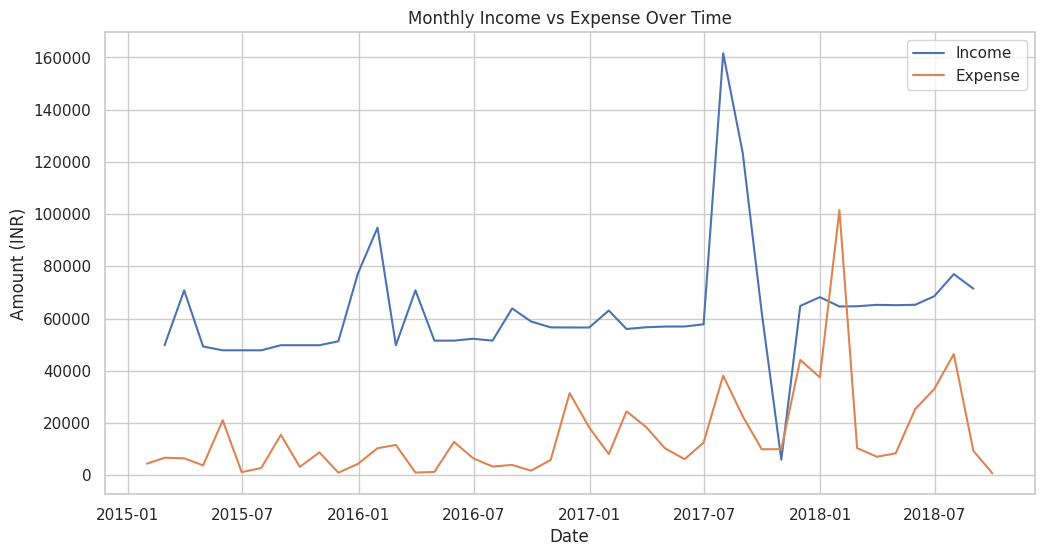

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_income.index, monthly_income['Amount'], label='Income')
plt.plot(monthly_expense.index, monthly_expense['Amount'], label='Expense')
plt.title('Monthly Income vs Expense Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (INR)')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Mode', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Transactions by Payment Mode')

Text(0.5, 0, 'Payment Mode')

Text(0, 0.5, 'Number of Transactions')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Cash'),
  Text(1, 0, 'Saving Bank account 1'),
  Text(2, 0, 'Credit Card'),
  Text(3, 0, 'Debit Card'),
  Text(4, 0, 'Share Market Trading'),
  Text(5, 0, 'Saving Bank account 2'),
  Text(6, 0, 'Fixed Deposit'),
  Text(7, 0, 'Recurring Deposit')])

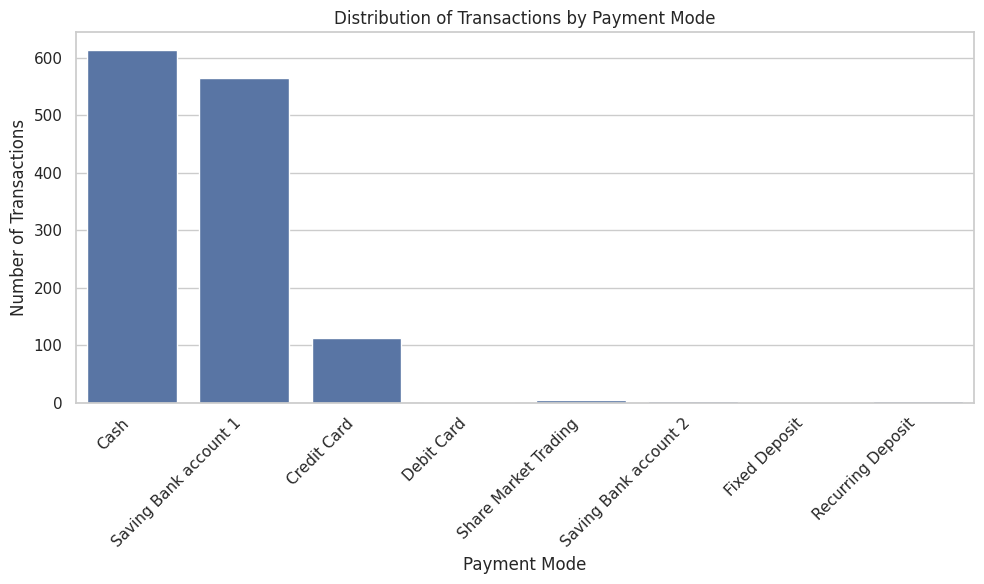

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Mode', data=df)
plt.title('Distribution of Transactions by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
df_expenses = df[df['Income/Expense'] == 'Expense']
#Top 15 Categories expenses
category_expenses = df_expenses.groupby('Category')['Amount'].sum().sort_values(ascending=True).tail(15)

<Figure size 1200x900 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Top 10 Expense Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Amount (INR)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Gift'),
  Text(1, 0, 'Tourism'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Food'),
  Text(6, 0, 'subscription'),
  Text(7, 0, 'Money transfer'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Transportation')])

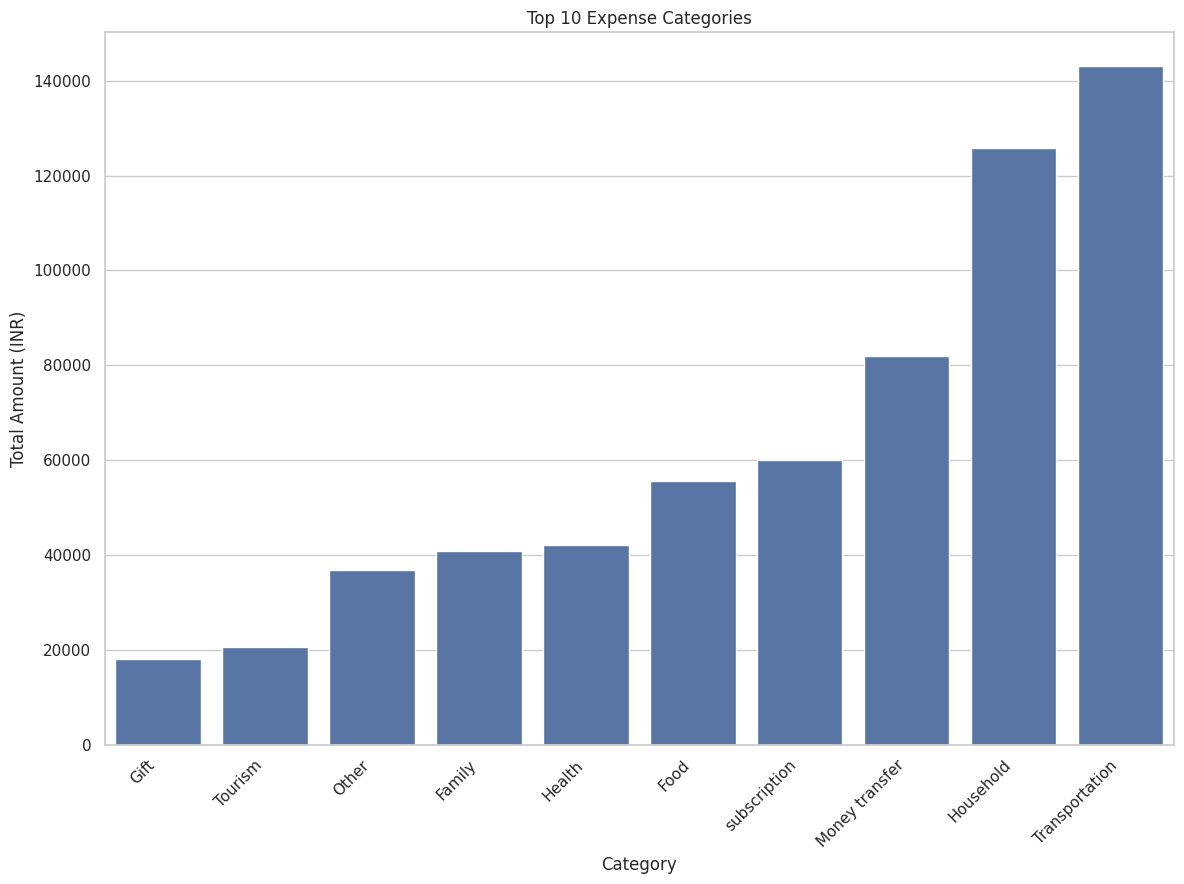

In [44]:
# Get the top 10 expense categories
top_10_categories = category_expenses.tail(10)

# Create a vertical bar chart
plt.figure(figsize=(12, 9))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.title('Top 10 Expense Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x900 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Top 10 Expense Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Amount (INR)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Gift'),
  Text(1, 0, 'Tourism'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Food'),
  Text(6, 0, 'subscription'),
  Text(7, 0, 'Money transfer'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Transportation')])

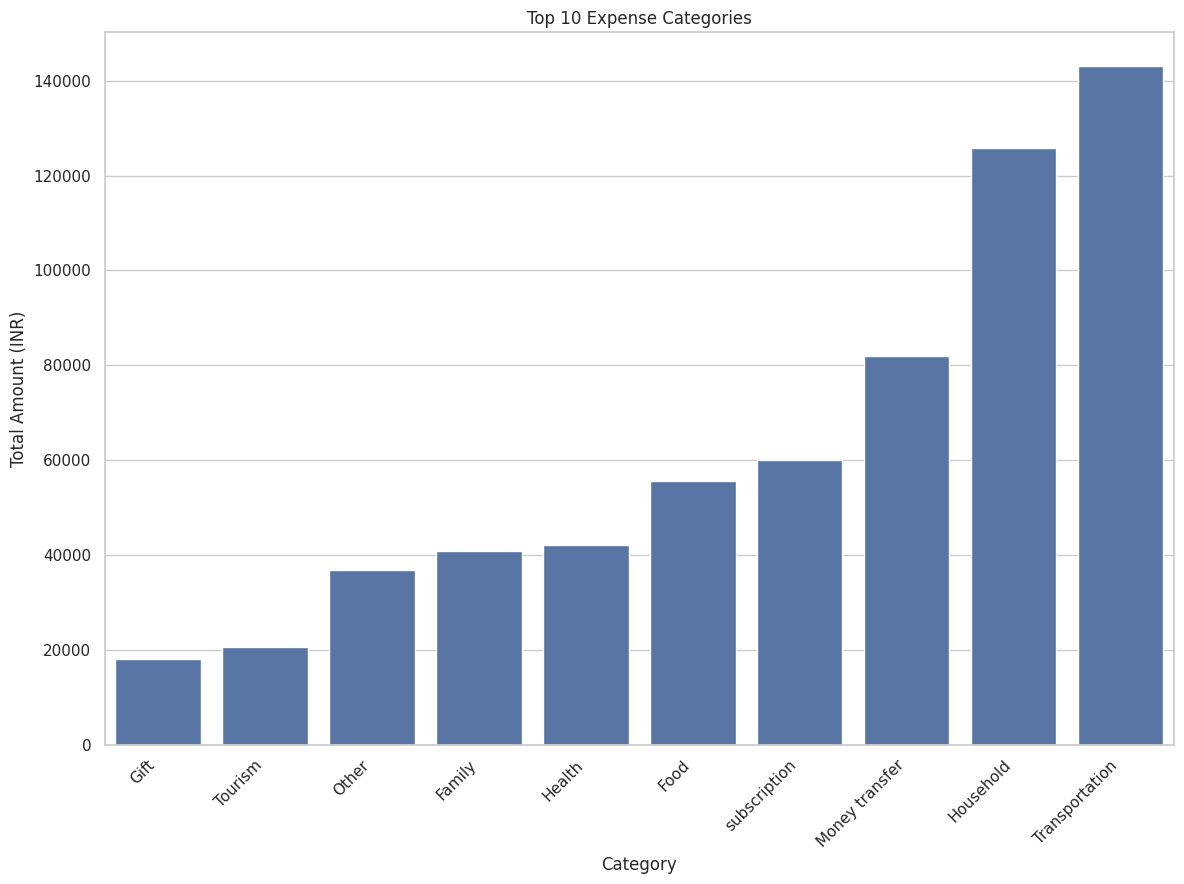

In [45]:
# Get the top 10 expense categories
category_expenses = df_expenses.groupby('Category')['Amount'].sum().sort_values(ascending=True).tail(15)
top_10_categories = category_expenses.tail(10)

# Create a vertical bar chart
plt.figure(figsize=(12, 9))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.title('Top 10 Expense Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Subcategory', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'auto'),
  Text(1, 0, 'Milk'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'Grocery'),
  Text(4, 0, 'Kirana'),
  Text(5, 0, 'Mobile Service Provider'),
  Text(6, 0, 'Train'),
  Text(7, 0, 'Lunch'),
  Text(8, 0, 'Medicine'),
  Text(9, 0, 'Dinner')])

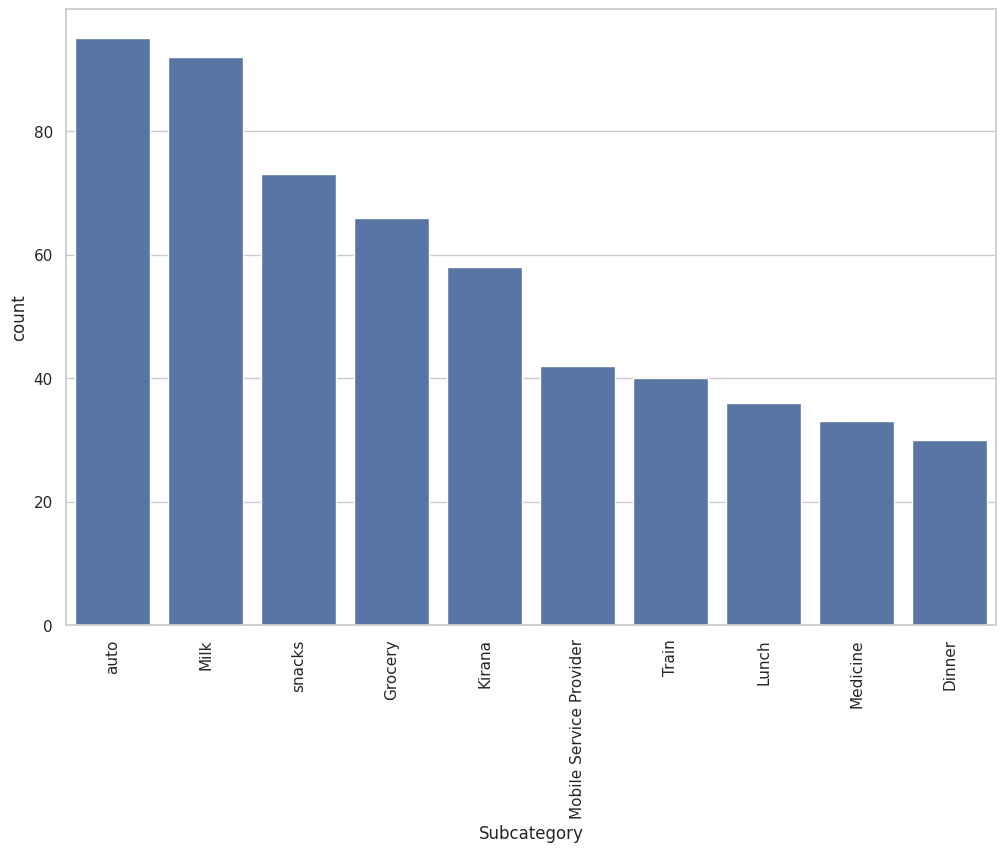

In [46]:
# Reset the index to fix the ValueError
df_reset = df.reset_index()

plt.figure(figsize = (12,8))
sns.countplot(data = df_reset, x = "Subcategory", order =
df_reset["Subcategory"].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Amount', ylabel='Category'>

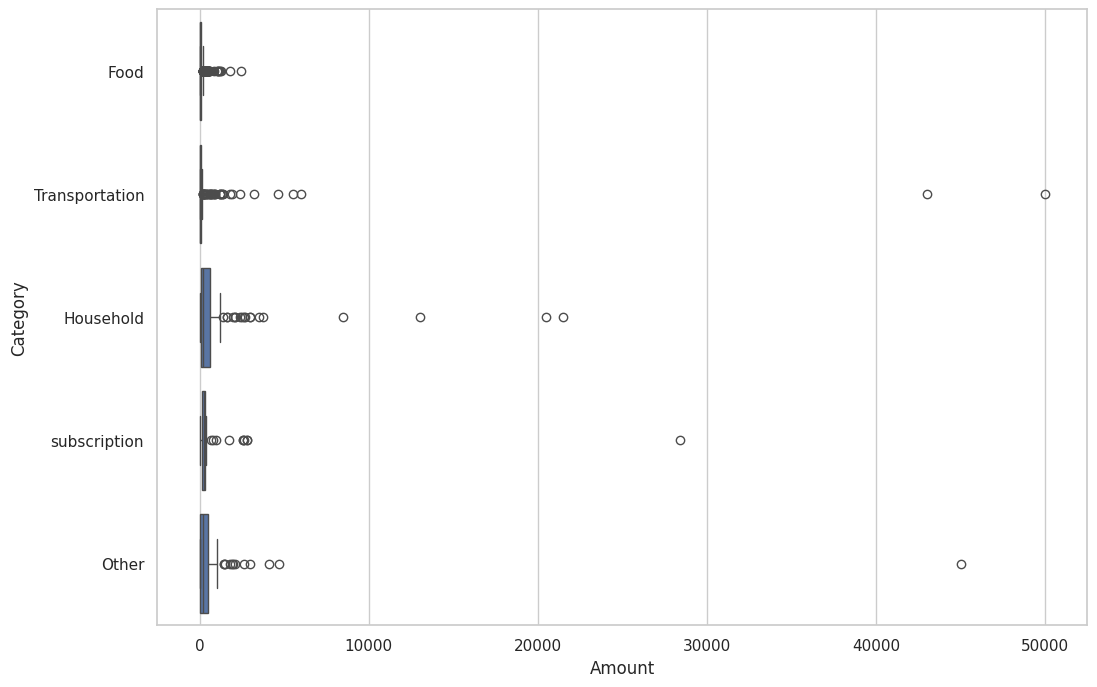

In [47]:
# Reset the index to fix the ValueError
df_reset = df.reset_index()

plt.figure(figsize = (12,8))
sns.boxplot(data = df_reset, x = "Amount", y = "Category", order =
df_reset["Category"].value_counts().iloc[:5].index)
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Amount', ylabel='Subcategory'>

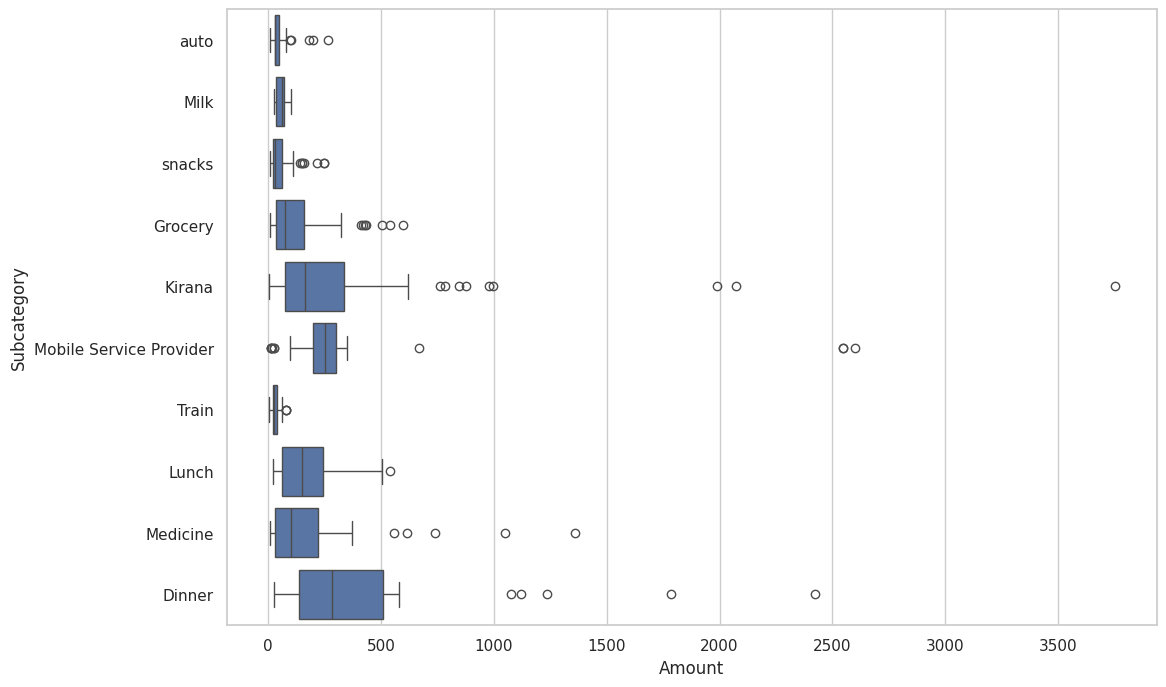

In [ ]:
# Reset the index to fix the ValueError
df_reset = df.reset_index()

plt.figure(figsize = (12,8))
sns.boxplot(data = df_reset, x = "Amount", y = "Subcategory", order =
df_reset["Subcategory"].value_counts().iloc[:10].index, )
plt.show()

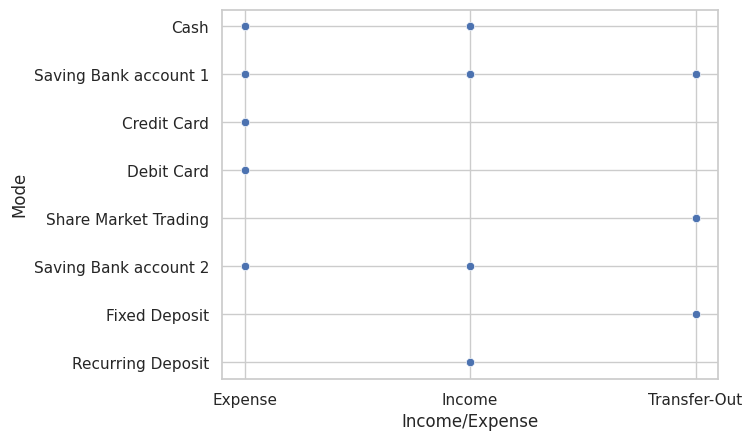

In [ ]:
sns.scatterplot(data = df,x = "Income/Expense", y = "Mode",);